TODO: you shoud direct volume rendering here
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


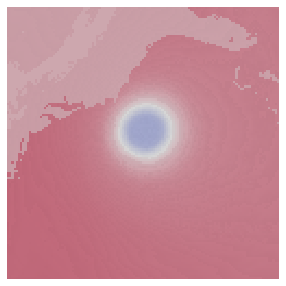

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)

###### get data value: x and y are locaion on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)
def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

###########main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF1.json')

##### 'img' is used to store the final image
img = np.zeros([125, 125, 3])

####### implment you direct volume rendering here and store the final image in "img"
print("TODO: you shoud implment direct volume rendering here")
            

####### show final image (img)
plt.imshow(img)
plt.show()